<a href="https://colab.research.google.com/github/victorjimmy/data-business-analyst-project/blob/main/JOB_SCRAPPING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BUSINESS INTELLIGENCE ANALYSTS JOBS IN UNITED KINGDOM

In [1]:
import pandas as pd
import re

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

# Define the root URL
root = 'https://www.reed.co.uk'
base_url = f'{root}/jobs/business-intelligence-analyst-jobs-in-united-kingdom'

# List to store job data
jobs_data = []

# Loop over 23 pages
for page in range(1, 24):
    website = f'{base_url}?pageno={page}'
    response = requests.get(website)
    soup = BeautifulSoup(response.text, 'html.parser')
    job_listings = soup.find_all('article', class_='card')

    for job in job_listings:
        title = job.find('a').get_text(strip=True) if job.find('a') else None
        company = job.find('a', class_='gtmJobListingPostedBy').get_text(strip=True) if job.find('a', class_='gtmJobListingPostedBy') else None
        location = job.find('li', {'data-qa' : 'job-card-location'}).get_text(strip=True) if job.find('li', {'data-qa' : 'job-card-location'}) else None
        salary = job.find('li', class_='job-card_jobMetadata__item___QNud list-group-item').get_text(strip=True) if job.find('li', class_='job-card_jobMetadata__item___QNud list-group-item') else None
        svg_icon = soup.find('svg', {'aria-labelledby': 'title-clock'})
        job_type = svg_icon.find_next(string=True).strip()
        #job_type = job.find('li', class_='time').get_text(strip=True) if job.find('li', class_='time') else None

        # Scrape skills from each job page
        job_url = root + job.find('a', href=True)['href']
        job_response = requests.get(job_url)
        job_soup = BeautifulSoup(job_response.text, 'html.parser')
        skills_section = job_soup.find('ul', class_='list-unstyled skills-list')
        skills = [li.get_text(strip=True) for li in skills_section.find_all('li', class_='lozenge skill-name')] if skills_section else None

        # Append job data
        jobs_data.append([title, company, location, salary, job_type, skills])

# Save data to CSV
with open('jobs.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Company', 'Location', 'Salary', 'Job Type', 'Skills'])
    writer.writerows(jobs_data)

print("Data saved to jobs.csv")


Data saved to jobs.csv


In [ ]:
df = pd.read_csv('jobs.csv')
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","['Business Intelligence', 'Business Intelligen..."
1,BI Analyst/Developer- SAP Business Objects-Tab...,IQ Talent Solutions,London,£500 - £530 per day,"Temporary, full-time",NaN
2,BI Analyst,Adria Solutions,"Manchester, Lancashire","£45,000 - £50,000 per annum, OTE, negotiable","Temporary, full-time",NaN
3,BI Analyst,In Technology Group Limited,"Southampton, Hampshire","£30,000 - £50,000 per annum","Temporary, full-time",['1Do you currently have a Graduate or PSW Vis...
4,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire","£35,000 - £55,000 per annum","Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
...,...,...,...,...,...,...
570,Data Analyst,eFinancialCareers,"Manchester, Lancashire",Competitive salary,"Permanent, full-time",NaN
571,Clearing Derivatives IT BA/PM,eFinancialCareers,London,Competitive salary,"Permanent, full-time",NaN
572,InfoSec Analyst - Assurance,eFinancialCareers,London,Competitive salary,"Permanent, full-time",NaN
573,Energy commodities back office analyst,eFinancialCareers,London,Competitive salary,"Permanent, full-time",NaN


In [ ]:
# Drop rows where 'Skills' column has NaN values
df = df.dropna(subset=['Skills']).reset_index(drop=True)
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","['Business Intelligence', 'Business Intelligen..."
1,BI Analyst,In Technology Group Limited,"Southampton, Hampshire","£30,000 - £50,000 per annum","Temporary, full-time",['1Do you currently have a Graduate or PSW Vis...
2,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire","£35,000 - £55,000 per annum","Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
3,BI Analyst,In Technology Group Limited,"Manchester, Lancashire","£35,000 - £55,000 per annum","Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
4,BI Analyst,In Technology Group Limited,"Birmingham, West Midlands (County)","£35,000 - £55,000 per annum","Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
...,...,...,...,...,...,...
209,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Leicester, Leicestershire","£30,000 - £35,000 per annum","Permanent, full-time","['Analysis', 'Analyst', 'Car Rental', 'Competi..."
210,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Luton, Bedfordshire","£30,000 - £35,000 per annum","Permanent, full-time","['Analysis', 'Analyst', 'Competitive Pricing',..."
211,Operational Risk Analyst,Henderson Scott,"Glasgow, Lanarkshire",£265 - £350 per day,"Permanent, full-time",['Operational Risk - Financial Services - 12 m...
212,Commercial Finance Business Partner,Michael Page Finance,Cheshire,Salary negotiable,"Permanent, full-time","['Commercial', 'Finance Manager', 'FP&A', 'FBP..."


In [ ]:
def clean_salary(salary):
    if isinstance(salary, str):
        if 'per annum' in salary:
            # Annual salary range
            salary = re.sub(r'[^\d-]', '', salary.split('per annum')[0])
            range_salary = [int(s) for s in salary.split('-')]
            return sum(range_salary) / len(range_salary)  # Return average annual salary
        elif 'per day' in salary:
            # Daily salary range, assuming 260 working days per year
            salary = re.sub(r'[^\d-]', '', salary.split('per day')[0])
            range_salary = [int(s) for s in salary.split('-')]
            return (sum(range_salary) / len(range_salary)) * 260  # Convert to annual salary
        elif 'per hour' in salary:
            # Hourly salary range, assuming 2080 working hours per year (40 hours/week * 52 weeks/year)
            salary = re.sub(r'[^\d-]', '', salary.split('per hour')[0])
            range_salary = [int(s) for s in salary.split('-')]
            return (sum(range_salary) / len(range_salary)) * 2080  # Convert to annual salary
        else:
            # Non-standard salary; return as is
            return salary
    else:
        # Handle non-string salary values (e.g., NaN)
        return salary

# Apply the function to the Salary column
df['Salary'] = df['Salary'].apply(clean_salary)

In [ ]:
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","['Business Intelligence', 'Business Intelligen..."
1,BI Analyst,In Technology Group Limited,"Southampton, Hampshire",40000.0,"Temporary, full-time",['1Do you currently have a Graduate or PSW Vis...
2,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire",45000.0,"Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
3,BI Analyst,In Technology Group Limited,"Manchester, Lancashire",45000.0,"Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
4,BI Analyst,In Technology Group Limited,"Birmingham, West Midlands (County)",45000.0,"Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
...,...,...,...,...,...,...
209,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Leicester, Leicestershire",32500.0,"Permanent, full-time","['Analysis', 'Analyst', 'Car Rental', 'Competi..."
210,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Luton, Bedfordshire",32500.0,"Permanent, full-time","['Analysis', 'Analyst', 'Competitive Pricing',..."
211,Operational Risk Analyst,Henderson Scott,"Glasgow, Lanarkshire",79950.0,"Permanent, full-time",['Operational Risk - Financial Services - 12 m...
212,Commercial Finance Business Partner,Michael Page Finance,Cheshire,Salary negotiable,"Permanent, full-time","['Commercial', 'Finance Manager', 'FP&A', 'FBP..."


In [ ]:
#convert the salary from a float to an integer, removing the decimal and leave non-numeric entries
def clean_salary(salary):
    try:
        return int(float(salary))
    except ValueError:
        # If conversion fails, return the original salary (non-numeric entries)
        return salary

# Apply the function to the Salary column
df['Salary'] = df['Salary'].apply(clean_salary)

In [ ]:
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","['Business Intelligence', 'Business Intelligen..."
1,BI Analyst,In Technology Group Limited,"Southampton, Hampshire",40000,"Temporary, full-time",['1Do you currently have a Graduate or PSW Vis...
2,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire",45000,"Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
3,BI Analyst,In Technology Group Limited,"Manchester, Lancashire",45000,"Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
4,BI Analyst,In Technology Group Limited,"Birmingham, West Midlands (County)",45000,"Temporary, full-time","['1Data', '1SQL', '1excel', '1data analyst', '..."
...,...,...,...,...,...,...
209,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Leicester, Leicestershire",32500,"Permanent, full-time","['Analysis', 'Analyst', 'Car Rental', 'Competi..."
210,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Luton, Bedfordshire",32500,"Permanent, full-time","['Analysis', 'Analyst', 'Competitive Pricing',..."
211,Operational Risk Analyst,Henderson Scott,"Glasgow, Lanarkshire",79950,"Permanent, full-time",['Operational Risk - Financial Services - 12 m...
212,Commercial Finance Business Partner,Michael Page Finance,Cheshire,Salary negotiable,"Permanent, full-time","['Commercial', 'Finance Manager', 'FP&A', 'FBP..."


In [ ]:
# Cleaning the Skills column by removing numeric characters, parentheses, and brackets.
def clean_skills(skill):
    if isinstance(skill, str):  # Check if the value is a string
        # Remove numeric characters and parentheses
        clean_skill = re.sub(r'[\d\(\)\[\]]', '', skill)
        # Capitalize the skill
        return clean_skill.strip()#.capitalize()
    else:
        return skill

# Apply the function to the Skills column
df['Skills'] = df['Skills'].apply(clean_skills)

In [ ]:
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","'Business Intelligence', 'Business Intelligenc..."
1,BI Analyst,In Technology Group Limited,"Southampton, Hampshire",40000,"Temporary, full-time",'Do you currently have a Graduate or PSW Visa?'
2,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
3,BI Analyst,In Technology Group Limited,"Manchester, Lancashire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
4,BI Analyst,In Technology Group Limited,"Birmingham, West Midlands (County)",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
...,...,...,...,...,...,...
209,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Leicester, Leicestershire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Car Rental', 'Competit..."
210,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Luton, Bedfordshire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Competitive Pricing', ..."
211,Operational Risk Analyst,Henderson Scott,"Glasgow, Lanarkshire",79950,"Permanent, full-time",'Operational Risk - Financial Services - mont...
212,Commercial Finance Business Partner,Michael Page Finance,Cheshire,Salary negotiable,"Permanent, full-time","'Commercial', 'Finance Manager', 'FP&A', 'FBP'..."


In [ ]:
# Removing non-text characters from the Skills sections
#df['Skills'] = df['Skills'].str.replace(r'[^A-Za-z0-9\s-]', '', regex=True)

In [ ]:
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","'Business Intelligence', 'Business Intelligenc..."
1,BI Analyst,In Technology Group Limited,"Southampton, Hampshire",40000,"Temporary, full-time",'Do you currently have a Graduate or PSW Visa?'
2,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
3,BI Analyst,In Technology Group Limited,"Manchester, Lancashire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
4,BI Analyst,In Technology Group Limited,"Birmingham, West Midlands (County)",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
...,...,...,...,...,...,...
209,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Leicester, Leicestershire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Car Rental', 'Competit..."
210,Van and Truck B2B Pricing Analyst - Hybrid & L...,Recruitment Avenue,"Luton, Bedfordshire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Competitive Pricing', ..."
211,Operational Risk Analyst,Henderson Scott,"Glasgow, Lanarkshire",79950,"Permanent, full-time",'Operational Risk - Financial Services - mont...
212,Commercial Finance Business Partner,Michael Page Finance,Cheshire,Salary negotiable,"Permanent, full-time","'Commercial', 'Finance Manager', 'FP&A', 'FBP'..."


In [ ]:
# Removing unwanted text characters from the Job Title
df['Title'] = df['Title'].str.replace(r'\s-\s.*$', '', regex=True)
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","'Business Intelligence', 'Business Intelligenc..."
1,BI Analyst,In Technology Group Limited,"Southampton, Hampshire",40000,"Temporary, full-time",'Do you currently have a Graduate or PSW Visa?'
2,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
3,BI Analyst,In Technology Group Limited,"Manchester, Lancashire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
4,BI Analyst,In Technology Group Limited,"Birmingham, West Midlands (County)",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
...,...,...,...,...,...,...
209,Van and Truck B2B Pricing Analyst,Recruitment Avenue,"Leicester, Leicestershire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Car Rental', 'Competit..."
210,Van and Truck B2B Pricing Analyst,Recruitment Avenue,"Luton, Bedfordshire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Competitive Pricing', ..."
211,Operational Risk Analyst,Henderson Scott,"Glasgow, Lanarkshire",79950,"Permanent, full-time",'Operational Risk - Financial Services - mont...
212,Commercial Finance Business Partner,Michael Page Finance,Cheshire,Salary negotiable,"Permanent, full-time","'Commercial', 'Finance Manager', 'FP&A', 'FBP'..."


In [ ]:
# Removing unwanted characters from the Job Title
df['Title'] = df['Title'].str.replace(r" - Hybrid.*|, MS Gold Partner.*| London.*", "", regex=True)
df

,Title,Company,Location,Salary,Job Type,Skills
0,Business Intelligence Analyst FTC,Willmott Dixon,"Letchworth Garden City, Hertfordshire",Competitive salary,"Temporary, full-time","'Business Intelligence', 'Business Intelligenc..."
1,BI Analyst,In Technology Group Limited,"Southampton, Hampshire",40000,"Temporary, full-time",'Do you currently have a Graduate or PSW Visa?'
2,BI Analyst,In Technology Group Limited,"Cambridge, Cambridgeshire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
3,BI Analyst,In Technology Group Limited,"Manchester, Lancashire",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
4,BI Analyst,In Technology Group Limited,"Birmingham, West Midlands (County)",45000,"Temporary, full-time","'Data', 'SQL', 'excel', 'data analyst', 'Busin..."
...,...,...,...,...,...,...
209,Van and Truck B2B Pricing Analyst,Recruitment Avenue,"Leicester, Leicestershire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Car Rental', 'Competit..."
210,Van and Truck B2B Pricing Analyst,Recruitment Avenue,"Luton, Bedfordshire",32500,"Permanent, full-time","'Analysis', 'Analyst', 'Competitive Pricing', ..."
211,Operational Risk Analyst,Henderson Scott,"Glasgow, Lanarkshire",79950,"Permanent, full-time",'Operational Risk - Financial Services - mont...
212,Commercial Finance Business Partner,Michael Page Finance,Cheshire,Salary negotiable,"Permanent, full-time","'Commercial', 'Finance Manager', 'FP&A', 'FBP'..."


In [ ]:
df.to_csv('jobs.csv', index=False)

In [3]:
# Importing the CSV file
df = pd.read_csv('/content/jobs.csv')

In [ ]:
# Skills sets for a Business Intelligence Analyst Jobs
skills_sets = df['Skills'].value_counts().head(10)

print(skills_sets)

Skills
'.NET', 'C#', 'SQL', 'SSIS'                                                                                                                    11
'Azure'                                                                                                                                         8
'Dynamics NAV/BC Developer'                                                                                                                     7
'MS Dynamics - CRM'                                                                                                                             4
'Google Analytics'                                                                                                                              4
'Automation', 'SharePoint', 'Technical Support', 'Visual Basic', 'Powershell', 'Vlookup', 'EDMS', 'IT Administrator', 'M', 'Power Automate'     4
'Advanced Excel', 'Data Analysis', 'Operational Analysis', 'Python', 'VBA'                                           

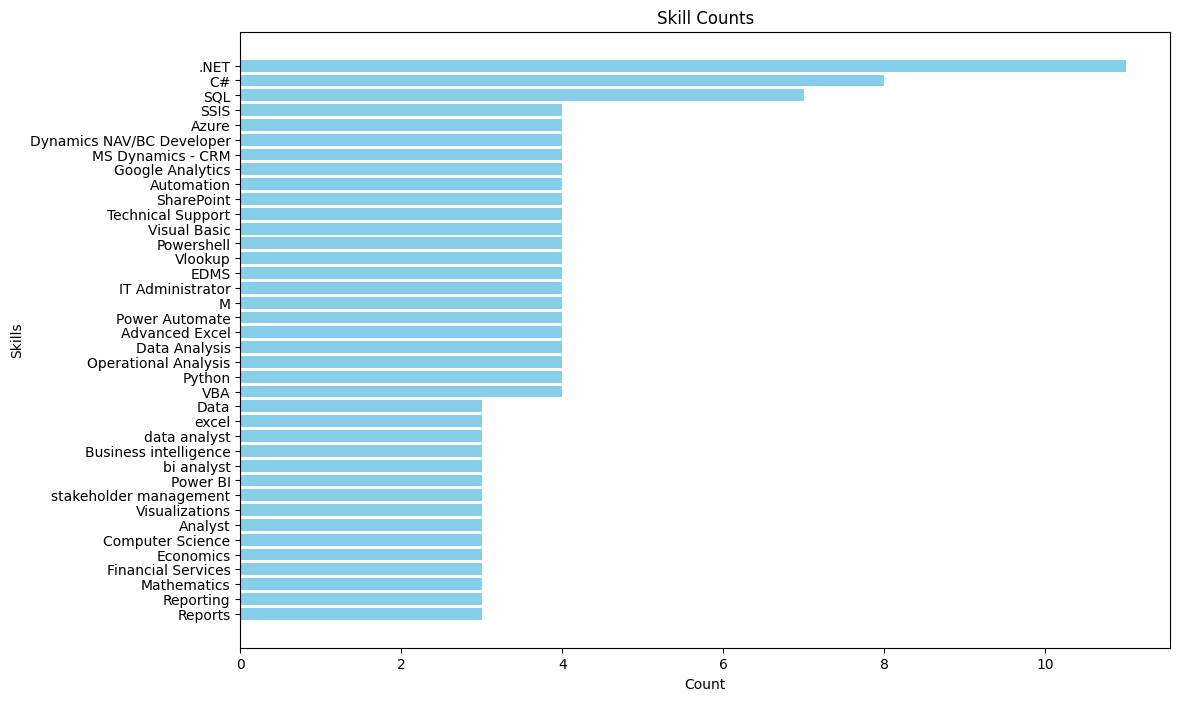

In [ ]:
# Representing the skills sets on a chart
import matplotlib.pyplot as plt

#  DataFrame
data = {
    'Skills': [
        '.NET', 'C#', 'SQL', 'SSIS', 'Azure', 'Dynamics NAV/BC Developer',
        'MS Dynamics - CRM', 'Google Analytics', 'Automation', 'SharePoint',
        'Technical Support', 'Visual Basic', 'Powershell', 'Vlookup',
        'EDMS', 'IT Administrator', 'M', 'Power Automate', 'Advanced Excel',
        'Data Analysis', 'Operational Analysis', 'Python', 'VBA', 'Data',
        'SQL', 'excel', 'data analyst', 'Business intelligence', 'bi analyst',
        'Power BI', 'stakeholder management', 'Visualizations', 'SQL',
        'Analyst', 'Computer Science', 'Data', 'Economics',
        'Financial Services', 'Mathematics', 'Python', 'Reporting', 'Reports', 'SQL'
    ],
    'Count': [
        11, 8, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2
    ]
}
df = pd.DataFrame(data)

# Create the plot

plt.figure(figsize=(12, 8))
plt.barh(df['Skills'], df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Skills')
plt.title('Skill Counts')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()

In [ ]:
#  Top 5 skills sets for a Business Inteligence Analyst Job
top_skills = df['Skills'].explode().value_counts().nlargest(5)

print(top_skills)

Skills
'.NET', 'C#', 'SQL', 'SSIS'                                                   11
'Azure'                                                                        8
'Dynamics NAV/BC Developer'                                                    7
'Advanced Excel', 'Data Analysis', 'Operational Analysis', 'Python', 'VBA'     4
'MS Dynamics - CRM'                                                            4
Name: count, dtype: int64


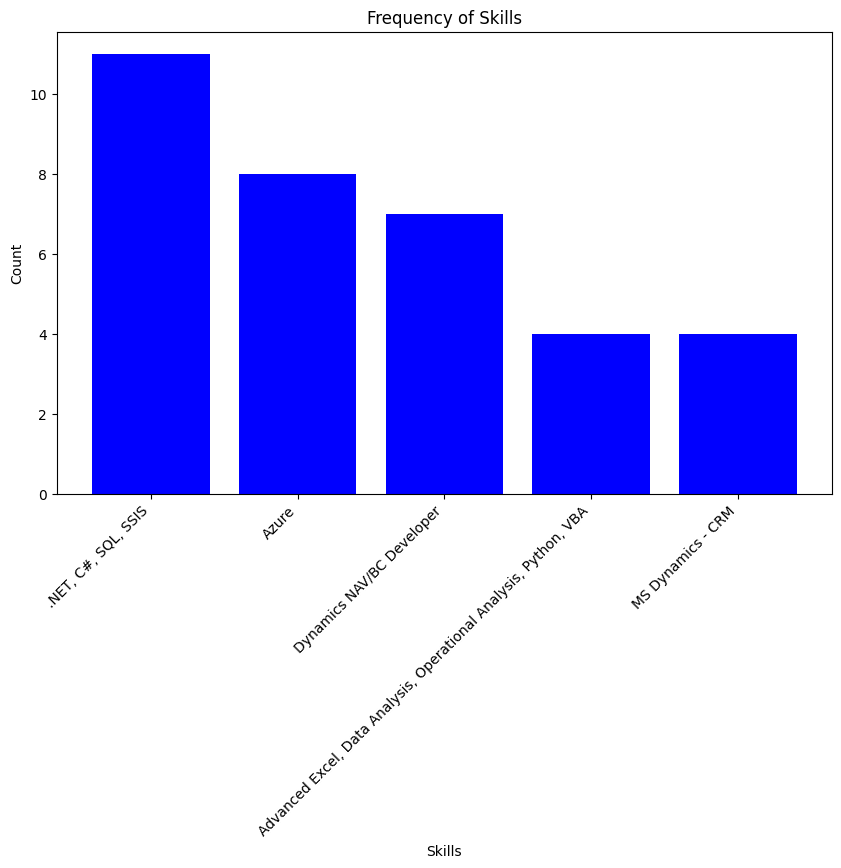

In [ ]:
# Representing the top 5 skills sets for a Business Inteligence Analyst Job on a chart
import matplotlib.pyplot as plt

# Data
data = {'Skills': ['.NET, C#, SQL, SSIS', 'Azure', 'Dynamics NAV/BC Developer', 'Advanced Excel, Data Analysis, Operational Analysis, Python, VBA', 'MS Dynamics - CRM'],
        'Count': [11, 8, 7, 4, 4]}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df['Skills'], df['Count'], color='blue')
plt.title("Frequency of Skills")
plt.xlabel("Skills")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


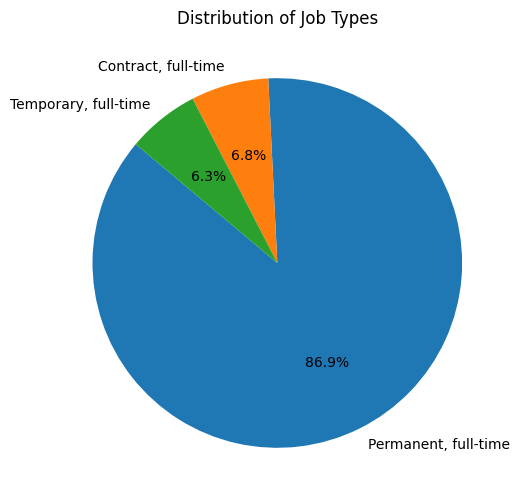

In [ ]:
# A Pie chart showing percentage distribution of Job Types
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/jobs.csv')

# Count occurrences of each job type
job_counts = df['Job Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Types')
plt.show()


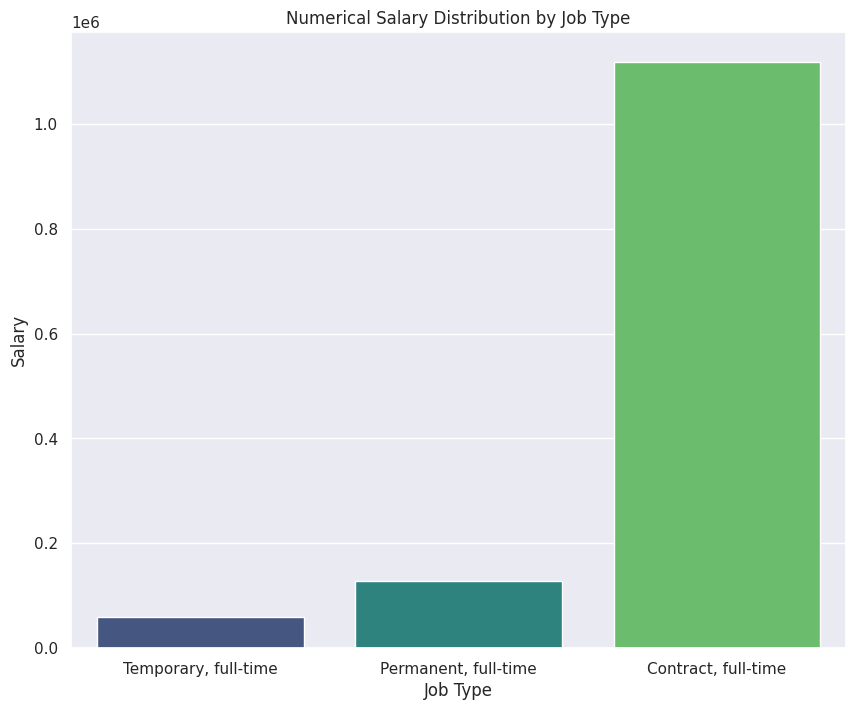

In [33]:
#Bar chart showing Numerical Salary distribution by Job Type
import seaborn as sns

# Filter out non-numeric Salary entries
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
filtered_df = df.dropna(subset=['Salary'])  # Drops rows where Salary is NaN

# Plot Salary by Job Type
sns.set(rc={'figure.figsize': (10, 8)})
sns.barplot(x='Job Type', y='Salary', hue='Job Type', data=filtered_df, errorbar=None, palette='viridis')

plt.xlabel('Job Type')
plt.ylabel('Salary')
plt.title('Numerical Salary Distribution by Job Type')
plt.show()


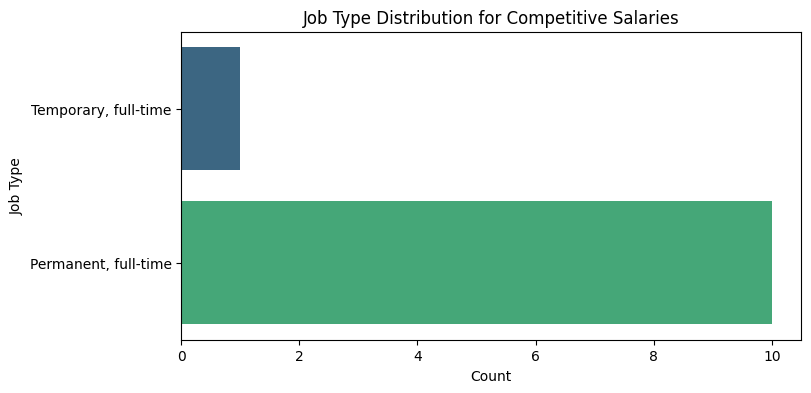

In [ ]:
#Bar chart showing Competitive Salary distribution by Job Type
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/jobs.csv')

# Filter rows with 'competitive salary' in the Salary column
filtered_df = df[df['Salary'].str.contains("competitive salary", case=False, na=False)]

# Plot job type against these filtered salaries
plt.figure(figsize=(8, 4))
sns.countplot(y='Job Type', data=filtered_df, hue='Job Type', palette='viridis', legend=False)
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.title('Job Type Distribution for Competitive Salaries')
plt.show()


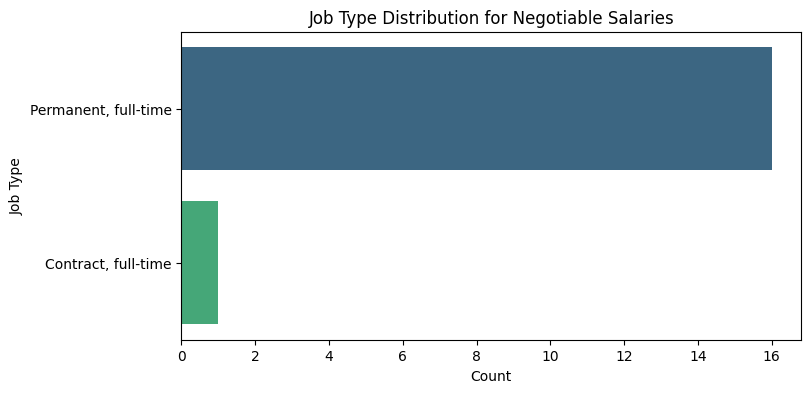

In [ ]:
#Bar chart showing Negiotiable Salary distribution by Job Type
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/jobs.csv')

# Filter rows with 'salary negotiable' in the Salary column
filtered_df = df[df['Salary'].str.contains("salary negotiable", case=False, na=False)]

# Plot job type against these filtered salaries
plt.figure(figsize=(8, 4))
sns.countplot(y='Job Type', data=filtered_df, hue='Job Type', palette='viridis', legend=False)
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.title('Job Type Distribution for Negotiable Salaries')
plt.show()


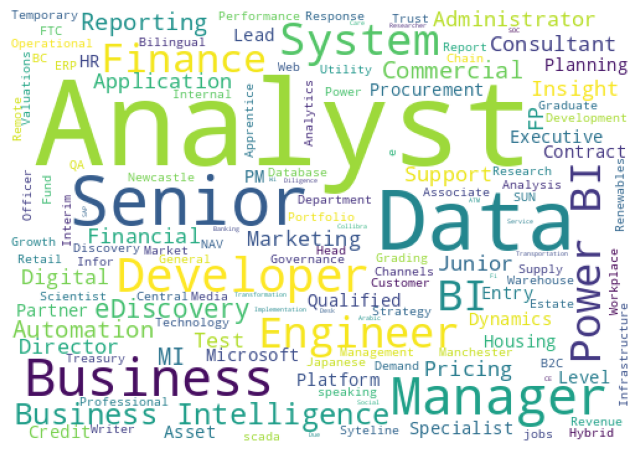

In [13]:
#  creating a Wordcloud showing words in Business Intelligence Analyst Job Titles
import matplotlib.pyplot as plt

from wordcloud import WordCloud
x = df["Title"].unique()
plt.subplots(figsize= (8,8))
wordcloud = WordCloud(  background_color = "white", width = 500, height = 350).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")
plt.show()

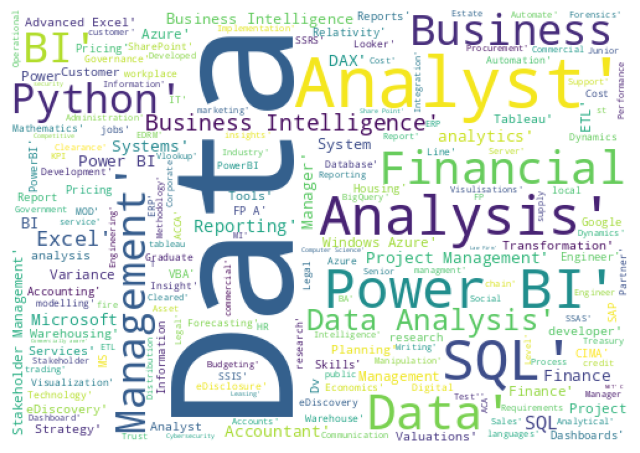

In [35]:
#  creating a Wordcloud showing words in Skills for  Business Intelligence Analyst Job
import matplotlib.pyplot as plt

from wordcloud import WordCloud
x = df["Skills"].unique()
plt.subplots(figsize= (8,8))
wordcloud = WordCloud(  background_color = "white", width = 500, height = 350).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")
plt.show()

In [34]:
# Plot of Treemap showing Company Location
import plotly.express as px

# Create the treemap
fig = px.treemap(df, path=['Location'], title=" Company Location")

# Show the plot
fig.show()
